# 下载泰坦尼克号旅客的数据集

In [1]:
import urllib.request
from sklearn import preprocessing
import os  # 操作系统包

data_url = "http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls"

data_file_path = "D:/程序/jupyter_notebook\实战/titanic3.xls"

if not os.path.isfile(data_file_path):   # 检查操作系统里是否含有这个文件
    result = urllib.request.urlretrieve(data_url,data_file_path)
    print('downloaded:',result)
else:
    print(data_file_path,'data file already exists.')

D:/程序/jupyter_notebook\实战/titanic3.xls data file already exists.


# 使用Pandas处理数据

In [2]:
import numpy
import pandas as pd

# 读取数据文件，结果为DataFrame格式
df_data = pd.read_excel(data_file_path)

In [3]:
# 查看数据摘要
df_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
df_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


# 筛选提取字段
- survival(是否生存)是标签字段，其他是候选特征字段
- 筛选提取需要的特征字段，去掉ticket,cabin等

In [5]:
# 筛选提取需要的特征字段，去掉ticket，cabin等

selected_cols = ['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
selected_df_data = df_data[selected_cols]
selected_df_data

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",3,female,14.5000,1,0,14.4542,C
1305,0,"Zabour, Miss. Thamine",3,female,NaN,1,0,14.4542,C
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5000,0,0,7.2250,C
1307,0,"Zakarian, Mr. Ortin",3,male,27.0000,0,0,7.2250,C


# 处理缺失值

In [6]:
# 找出有null值得字段
# Pandas判断缺失值一般采用isnull(),生成所有数据得True/False矩阵
# 这是元素级别的判断，把对应的所有元素的位置都列出来，元素为空或者NA就显示True，否则就是False
selected_df_data.isnull()

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False
1305,False,False,False,False,True,False,False,False,False
1306,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False


In [7]:
# 判断哪些“列”存在缺失值
# 列级别的判断，只要该列有为空或者NA的元素，就为True，否则False

selected_df_data.isnull().any()

survived    False
name        False
pclass      False
sex         False
age          True
sibsp       False
parch       False
fare         True
embarked     True
dtype: bool

In [8]:
# 将列中为空的个数统计出来

selected_df_data.isnull().sum()

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [9]:
# 显示存在缺失值的行列，确定缺失值的位置

selected_df_data[selected_df_data.isnull().values==True]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
15,0,"Baumann, Mr. John D",1,male,NaN,0,0,25.9250,S
37,1,"Bradley, Mr. George (""George Arthur Brayton"")",1,male,NaN,0,0,26.5500,S
40,0,"Brewe, Dr. Arthur Jackson",1,male,NaN,0,0,39.6000,C
46,0,"Cairns, Mr. Alexander",1,male,NaN,0,0,31.0000,S
59,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",1,female,NaN,0,0,27.7208,C
...,...,...,...,...,...,...,...,...,...
1293,0,"Williams, Mr. Howard Hugh ""Harry""",3,male,NaN,0,0,8.0500,S
1297,0,"Wiseman, Mr. Phillippe",3,male,NaN,0,0,7.2500,S
1302,0,"Yousif, Mr. Wazli",3,male,NaN,0,0,7.2250,C
1303,0,"Yousseff, Mr. Gerious",3,male,NaN,0,0,14.4583,C


# 定义数据预处理函数

In [10]:
def prepare_data(df_data):
    #删除name字段
    df = df_data.drop(['name'],axis=1)
    
    # 填充值
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean) # 为缺失记录填充值
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean) # 为缺失fare记录填充值
    
    # 编码转换 
    df['sex'] = df['sex'].map({'female':0,'male':1}).astype(int) # 把sex值由字符串转换为数值
    df['embarked'] = df['embarked'].fillna('S')     # 为缺失embarked记录填充值
    df['embarked'] = df['embarked'].map({'C':0,'Q':1,'S':2}).astype(int) # 把embarked值由字符串转换为数组
    
    #分离特征值和标签值
    ndarray_data = df.values # 转换为ndarray数组
    features = ndarray_data[:,1:]   #后七列是特征值
    label = ndarray_data[:,0]       #第0列是标签值
    
    # 特征值标准化
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    norm_features = minmax_scale.fit_transform(features)
    return norm_features,label

# 数据准备

In [11]:
# shuffle 打乱数据顺序，通过Pandas的抽样函数sample实现，frac为百分比
# selected_df_data数据保持不变

shuffled_df_data = selected_df_data.sample(frac = 1)

x_data,y_data = prepare_data(shuffled_df_data)

train_size = int(len(x_data) * 0.8)

x_train = x_data[:train_size]
y_train = y_data[:train_size]

x_test = x_data[train_size:]
y_test = y_data[train_size:]

# 建立模型结构

In [12]:
import tensorflow as tf

# 建立Keras序列模型
model = tf.keras.models.Sequential()

# 加入第一层，输入特征数据是7列，也可以用input_shape=(7,)
model.add(tf.keras.layers.Dense(units=64,input_dim=7,
                               use_bias = True,
                               kernel_initializer='uniform',
                               bias_initializer='zeros',
                               activation='relu'))# use_bias默认为True偏置项

# 加入第二层
model.add(tf.keras.layers.Dense(units=32,activation='sigmoid'))

# 输出层
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# 模型结构

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


# 模型设置

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
             loss='binary_crossentropy',
             metrics=['accuracy'])
# optimizer可以是优化器的名字，如'adam',也可以是优化器的实例
# loss是损失函数名
#  -  用sigmoid作为激活函数，一般损失函数选用binary_crossentropy
#  -  用softmax作为激活函数，一般损失函数选用categorical_crossentropy
# metrics 模型要训练和评估的度量值

# 模型回调参数设置

In [15]:
# 设置回调参数，内置的回调还包括：
# tf.keras.callbacks.LearningRateScheduler()   #动态调整学习率
# tf.keras,callbacks.EarlyStopping             #早停，防止过拟合
logdir = os.path.join("logs")
if not os.path.exists(logdir):
    os.mkdir(logdir)
checkpoint_path = os.path.join(logdir,"./checkpoint/Titanic.{epoch:02d}.ckpt")

callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir=logdir,
                                  histogram_freq=2),
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      verbose = 1,
                                      save_freq = 5)
]

# 模型训练

In [16]:
train_history = model.fit(x=x_train,
                          y=y_train,
                         validation_split=0.2,
                         epochs=100,
                         batch_size=40,
                         callbacks=callbacks,
                         verbose=1)
# 返回值：过程历史对象，包括训练过程的loss和acc数据

Train on 837 samples, validate on 210 samples
Epoch 1/100

Epoch 00001: saving model to logs\./checkpoint/Titanic.01.ckpt
 40/837 [>.............................] - ETA: 11s - loss: 0.6758 - accuracy: 0.6000
Epoch 00001: saving model to logs\./checkpoint/Titanic.01.ckpt
 80/837 [=>............................] - ETA: 6s - loss: 0.6653 - accuracy: 0.6250 
Epoch 00001: saving model to logs\./checkpoint/Titanic.01.ckpt

Epoch 00001: saving model to logs\./checkpoint/Titanic.01.ckpt
160/837 [====>.........................] - ETA: 3s - loss: 0.6707 - accuracy: 0.6062
Epoch 00001: saving model to logs\./checkpoint/Titanic.01.ckpt

Epoch 00001: saving model to logs\./checkpoint/Titanic.01.ckpt
240/837 [=======>......................] - ETA: 2s - loss: 0.6715 - accuracy: 0.6000
Epoch 00001: saving model to logs\./checkpoint/Titanic.01.ckpt

Epoch 00001: saving model to logs\./checkpoint/Titanic.01.ckpt
320/837 [==========>...................] - ETA: 1s - loss: 0.6581 - accuracy: 0.6219
Epoch 0

In [17]:
train_history.history

{'loss': [0.6494259788001595,
  0.5835137328793926,
  0.5225326094860957,
  0.48726159779259237,
  0.4786233708992369,
  0.46878463891529554,
  0.46139031990454615,
  0.4582015236432407,
  0.4564103378403571,
  0.454447557920481,
  0.45273687513356,
  0.45074994201586094,
  0.4484846669926866,
  0.4486937234834673,
  0.4458764699624858,
  0.4450971975192659,
  0.4502147048747383,
  0.4442103745475892,
  0.44185006550848127,
  0.44165034305522377,
  0.4415838454572958,
  0.4412701495944243,
  0.4402775993412683,
  0.44097266576765826,
  0.4392479722217847,
  0.4393754662365042,
  0.43865141799515434,
  0.44383026597177966,
  0.43688866043888397,
  0.4363569927756789,
  0.4383851535787434,
  0.43706122432415917,
  0.43626758993882575,
  0.4378976848960065,
  0.43264771526147533,
  0.4385479072302473,
  0.43476672376213393,
  0.4384756691780569,
  0.4361286861210029,
  0.4361805339725499,
  0.4334076097860416,
  0.4346279912809602,
  0.43932076391353403,
  0.44139510058445175,
  0.4368355

In [18]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 训练过程可视化

In [19]:
import matplotlib.pyplot as plt

def visu_train_history(train_history,train_metric,val_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[val_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

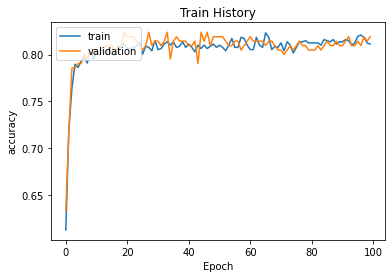

In [20]:
visu_train_history(train_history,'accuracy','val_accuracy')

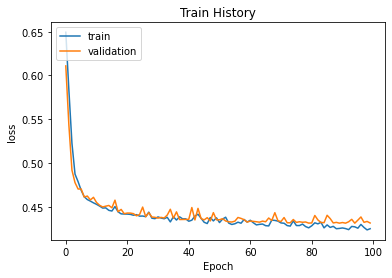

In [21]:
visu_train_history(train_history,'loss','val_loss')

# 模型评估

In [22]:
evaluate_result = model.evaluate(x=x_test,
                                y=y_test)

262/262 [==============================] - 0s 42us/sample - loss: 0.4843 - accuracy: 0.7939


In [23]:
evaluate_result

[0.484325707413768, 0.79389316]

In [24]:
model.metrics_names

['loss', 'accuracy']

# 模型应用：预测Rose和Jack的生存概率


## 添加旅客信息

In [25]:
#  保留的旅客信息字段

selected_cols

['survived',
 'name',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked']

In [26]:
# Jack和Rose的旅客信息
Jack_info = [0,'Jack',3,'male',23,1,0,5.0000,'S']
Rose_info = [1, 'Rose',1,'female',20,1,0,100.0000,'S']

In [27]:
# 创建新的旅客DataFrame
new_passenger_pd = pd.DataFrame([Jack_info,Rose_info],columns=selected_cols)

In [28]:
# 在老的DataFrame中加入新的旅客信息
all_passenager_pd = selected_df_data.append(new_passenger_pd)

In [29]:
all_passenager_pd[-3:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.875,S
0,0,Jack,3,male,23.0,1,0,5.000,S
1,1,Rose,1,female,20.0,1,0,100.000,S


In [30]:
# 数据准备
x_features,y_label = prepare_data(all_passenager_pd)

# 利用模型计算旅客生存概率
surv_probability = model.predict(x_features)

In [31]:
# 在数据表最后一列插入生存概率
all_passenager_pd.insert(len(all_passenager_pd.columns),'surv_probability',surv_probability)

In [32]:
all_passenager_pd[-5:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,surv_probability
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5,0,0,7.225,C,0.174711
1307,0,"Zakarian, Mr. Ortin",3,male,27.0,0,0,7.225,C,0.172106
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.875,S,0.120938
0,0,Jack,3,male,23.0,1,0,5.000,S,0.124108
1,1,Rose,1,female,20.0,1,0,100.000,S,0.989673


In [33]:
all_passenager_pd[(all_passenager_pd['survived']==0)&(all_passenager_pd['surv_probability'])]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,surv_probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.993958
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0,1,2,151.5500,S,0.372810
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.988737
7,0,"Andrews, Mr. Thomas Jr",1,male,39.0,0,0,0.0000,S,0.377176
9,0,"Artagaveytia, Mr. Ramon",1,male,71.0,0,0,49.5042,C,0.171555
...,...,...,...,...,...,...,...,...,...,...
1305,0,"Zabour, Miss. Thamine",3,female,NaN,1,0,14.4542,C,0.727164
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5,0,0,7.2250,C,0.174711
1307,0,"Zakarian, Mr. Ortin",3,male,27.0,0,0,7.2250,C,0.172106
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.8750,S,0.120938


# 恢复文件模型

In [34]:
logdir = './logs'
checkpoint_path = './logs/checkpoint/Titanic.{epoch:02d}.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [35]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'./logs/checkpoint\\Titanic.100.ckpt'

In [36]:
model.load_weights(latest)

# 评估模型

In [37]:
loss, acc = model.evaluate(x_test,y_test)

print("Restored model,accuracy:{:5.2f}%".format(100*acc))

262/262 [==============================] - 0s 46us/sample - loss: 0.4843 - accuracy: 0.7939
Restored model,accuracy:79.39%
